In [1]:
from instruction_reader import InstructionReader
from parse import parse_sexprs
import random

import tensorflow.compat.v1 as tf
import os
import pdb
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from tf_optimizer import TfOptimizer
from parse import parse_sexprs
from instruction_reader import InstructionReader

from util_graph_gen import *
from graph_generator import *


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)
tf.disable_v2_behavior()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import argparse
import pdb

from builder import build
from util import DEFAULTS
import copy

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def'),

args = parser.parse_args()
args = vars(args)


In [3]:
args['enforce_goals'] = True

In [4]:
from importlib import reload

import util_graph_gen
reload(util_graph_gen)
from util_graph_gen import *

import graph_generator
reload(graph_generator)
from graph_generator import *

Processing instructions...:   0%|          | 0/5 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3 P4) polygon ()
assert (para (connecting P1 P2) (connecting P3 P4))
assert (para (connecting P1 P4) (connecting P2 P3))
assert (perp (connecting P1 P2) (connecting P1 P4))
assert (cong P1 P2 P1 P4)


Sampling initializations...: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


[     0]  10.516953587937 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0169333397
  polygon-first-eq-last                              0.0174089753
  polygon-first-angle-eq-sampled                     0.0051789656
  para_(connecting P1 P2)_(connecting P3 P4)         0.9364060903
  para_(connecting P1 P4)_(connecting P2 P3)         0.1112068856
  perp_(connecting P1 P2)_(connecting P1 P4)         2.9264784745
  cong_P1_P2_P1_P4                                   6.5033297858
  points                                             0.0000110713
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


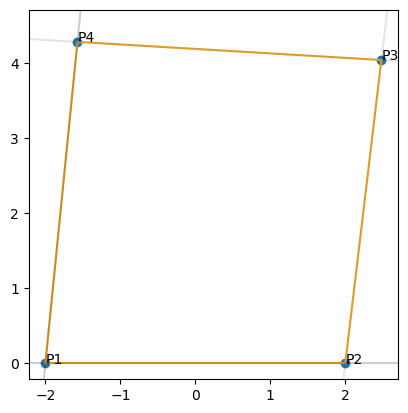

======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000029263
  polygon-first-eq-last                              0.0000609469
  polygon-first-angle-eq-sampled                     0.0000177835
  para_(connecting P1 P2)_(connecting P3 P4)         0.0000753902
  para_(connecting P1 P4)_(connecting P2 P3)         0.0001837813
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0000056143
  cong_P1_P2_P1_P4                                   0.0000042212
  points                                             0.0000104770
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


Found 1 models


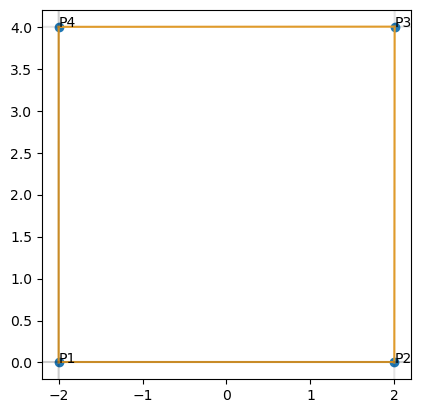

Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]

######################## Lines drawn above ########################
['(param (P1 P2 P3 P4) polygon)', '(assert (para (line P1 P2) (line P3 P4)))', '(assert (para (line P1 P4) (line P2 P3)))', '(assert (perp (line P1 P2) (line P1 P4)))', '(assert (cong P1 P2 P1 P4))']

INPUT INSTRUCTIONS:
sample (P1 P2 P3 P4) polygon ()
assert (para (connecting P1 P2) (connecting P3 P4))
assert (para (connecting P1 P4) (connecting P2 P3))
assert (perp (connecting P1 P2) (connecting P1 P4))
assert (cong P1 P2 P1 P4)
assert (circumcenter P2 P4 P1 P3)


Sampling initializations...: 100%|██████████| 10/10 [00:31<00:00,  3.18s/it]


[     0]  11.725163213239 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0007922451
  polygon-first-eq-last                              0.0020991611
  polygon-first-angle-eq-sampled                     0.0019211680
  para_(connecting P1 P2)_(connecting P3 P4)         0.9105921090
  para_(connecting P1 P4)_(connecting P2 P3)         0.8830579625
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0020263666
  cong_P1_P2_P1_P4                                   2.4897441402
  circumcenter_P2_P4_P1_P3                           7.4349184946
  points                                             0.0000115663
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


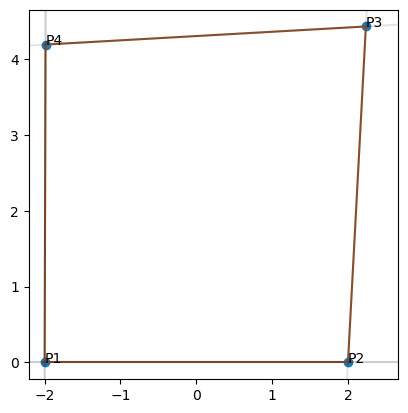

[   100]   7.319541342622 ||   0.096496
[   200]   7.320642877392 ||   0.093115
[   300]   7.319542747948 ||   0.089852
[   400]   7.319364204736 ||   0.086704
[   500]   7.319922406119 ||   0.083666
[   600]   7.319881253806 ||   0.080734
[   700]   7.319432686204 ||   0.077906
[   800]   7.319344533107 ||   0.075176
[   900]   7.320392198048 ||   0.072542
[  1000]   7.320531760613 ||   0.070000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000345102
  polygon-first-eq-last                              0.0010060835
  polygon-first-angle-eq-sampled                     0.0000398175
  para_(connecting P1 P2)_(connecting P3 P4)         0.0669107713
  para_(connecting P1 P4)_(connecting P2 P3)         0.0523741013
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5217201151
  cong_P1_P2_P1_P4                                   0.0179975190
  circumcenter_P2_P4_P1_P3                           6.6604382826
  points                  

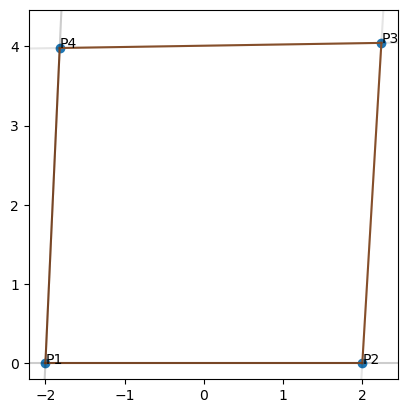

[  1100]   7.320551230019 ||   0.067547
[  1200]   7.320189741002 ||   0.065180
[  1300]   7.320015956549 ||   0.062897
[  1400]   7.320325888714 ||   0.060693
[  1500]   7.319699486358 ||   0.058566
[  1600]   7.319637794317 ||   0.056514
[  1700]   7.320160822552 ||   0.054534
[  1800]   7.319382940143 ||   0.052623
[  1900]   7.319351341765 ||   0.050779
[  2000]   7.319344703703 ||   0.049000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000007
  polygon-first-eq-last                              0.0000076321
  polygon-first-angle-eq-sampled                     0.0000000549
  para_(connecting P1 P2)_(connecting P3 P4)         0.0647801951
  para_(connecting P1 P4)_(connecting P2 P3)         0.0518773728
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5249922529
  cong_P1_P2_P1_P4                                   0.0155455255
  circumcenter_P2_P4_P1_P3                           6.6621311079
  points                  

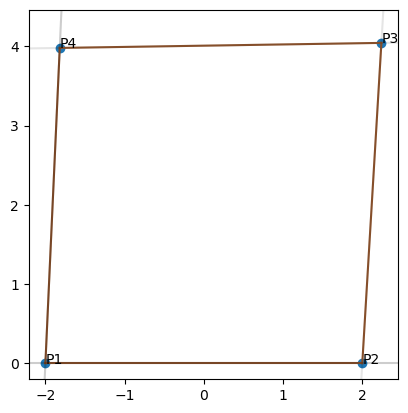

[  2100]   7.319354582068 ||   0.047283
[  2200]   7.319362883423 ||   0.045626
[  2300]   7.319374712452 ||   0.044028
[  2400]   7.319425084716 ||   0.042485
[  2500]   7.319499783815 ||   0.040996
[  2600]   7.319612084683 ||   0.039560
[  2700]   7.319713154495 ||   0.038174
[  2800]   7.322586714266 ||   0.036836
[  2900]   7.319356107488 ||   0.035545
[  3000]   7.319412343425 ||   0.034300
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000063
  polygon-first-eq-last                              0.0000747797
  polygon-first-angle-eq-sampled                     0.0000000998
  para_(connecting P1 P2)_(connecting P3 P4)         0.0646409355
  para_(connecting P1 P4)_(connecting P2 P3)         0.0518847838
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5255017912
  cong_P1_P2_P1_P4                                   0.0154160542
  circumcenter_P2_P4_P1_P3                           6.6618833309
  points                  

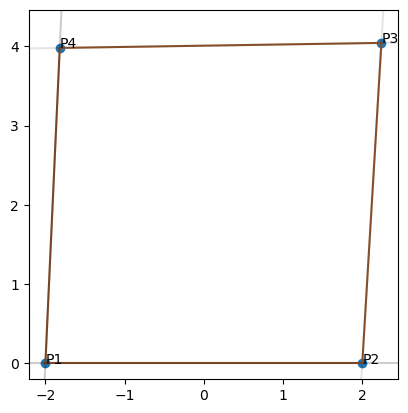

[  3100]   7.319463169998 ||   0.033098
[  3200]   7.319534045299 ||   0.031938
[  3300]   7.319595818105 ||   0.030819
[  3400]   7.319345326851 ||   0.029739
[  3500]   7.319354338259 ||   0.028697
[  3600]   7.319410069919 ||   0.027692
[  3700]   7.319444040467 ||   0.026722
[  3800]   7.319769099806 ||   0.025785
[  3900]   7.319341660827 ||   0.024882
[  4000]   7.319344928101 ||   0.024010
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000001
  polygon-first-eq-last                              0.0000078824
  polygon-first-angle-eq-sampled                     0.0000000020
  para_(connecting P1 P2)_(connecting P3 P4)         0.0648011443
  para_(connecting P1 P4)_(connecting P2 P3)         0.0518636174
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5250065772
  cong_P1_P2_P1_P4                                   0.0155889711
  circumcenter_P2_P4_P1_P3                           6.6620661719
  points                  

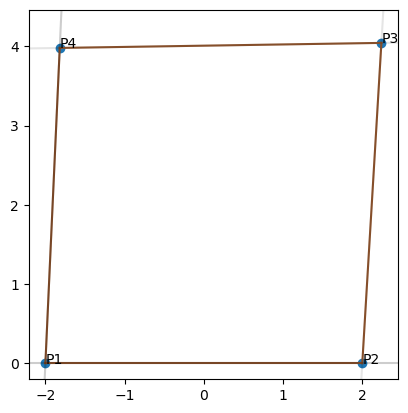

[  4100]   7.319356000042 ||   0.023169
[  4200]   7.319395282065 ||   0.022357
[  4300]   7.319452339503 ||   0.021574
[  4400]   7.321311920772 ||   0.020818
[  4500]   7.319345846819 ||   0.020088
[  4600]   7.319374891372 ||   0.019384
[  4700]   7.319470544816 ||   0.018705
[  4800]   7.319341332058 ||   0.018050
[  4900]   7.319350693639 ||   0.017417
[     0]  20.094603902131 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0412723574
  polygon-first-eq-last                              0.0126863410
  polygon-first-angle-eq-sampled                     0.0064207644
  para_(connecting P1 P2)_(connecting P3 P4)         1.5336192387
  para_(connecting P1 P4)_(connecting P2 P3)         0.1681237151
  perp_(connecting P1 P2)_(connecting P1 P4)         8.5807211081
  cong_P1_P2_P1_P4                                   4.7802444370
  circumcenter_P2_P4_P1_P3                           4.9715051022
  points                  

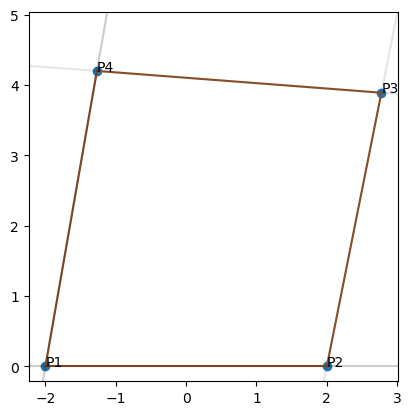

[   100]   7.319675283236 ||   0.096496
[   200]   7.320330508125 ||   0.093115
[   300]   7.320318672593 ||   0.089852
[   400]   7.319582459980 ||   0.086704
[   500]   7.320073016455 ||   0.083666
[   600]   7.319381994057 ||   0.080734
[   700]   7.320127882858 ||   0.077906
[   800]   7.319613888058 ||   0.075176
[   900]   7.319347702487 ||   0.072542
[  1000]   7.319979295372 ||   0.070000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000025
  polygon-first-eq-last                              0.0005819841
  polygon-first-angle-eq-sampled                     0.0000379161
  para_(connecting P1 P2)_(connecting P3 P4)         0.0650861978
  para_(connecting P1 P4)_(connecting P2 P3)         0.0505350420
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5289791959
  cong_P1_P2_P1_P4                                   0.0161673120
  circumcenter_P2_P4_P1_P3                           6.6585810844
  points                  

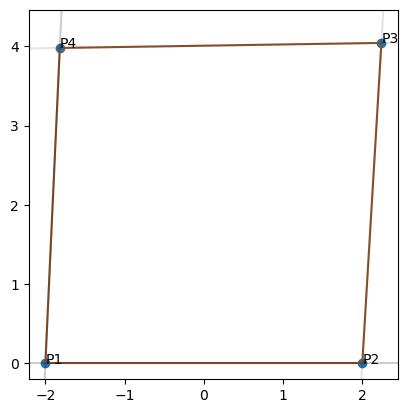

[  1100]   7.319709398956 ||   0.067547
[  1200]   7.319446552360 ||   0.065180
[  1300]   7.319375442178 ||   0.062897
[  1400]   7.319355034579 ||   0.060693
[  1500]   7.319344849169 ||   0.058566
[  1600]   7.319347475643 ||   0.056514
[  1700]   7.319352701218 ||   0.054534
[  1800]   7.319387196363 ||   0.052623
[  1900]   7.319417270755 ||   0.050779
[  2000]   7.319440824873 ||   0.049000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000001035
  polygon-first-eq-last                              0.0001036344
  polygon-first-angle-eq-sampled                     0.0000000225
  para_(connecting P1 P2)_(connecting P3 P4)         0.0646997917
  para_(connecting P1 P4)_(connecting P2 P3)         0.0519420983
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5249926425
  cong_P1_P2_P1_P4                                   0.0155504435
  circumcenter_P2_P4_P1_P3                           6.6621415267
  points                  

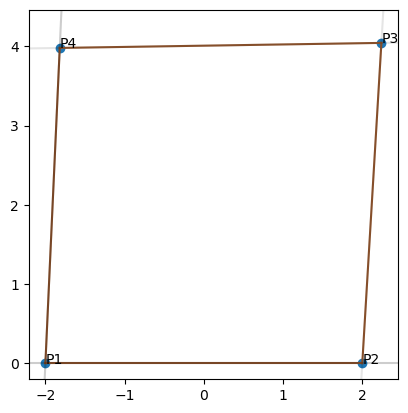

[  2100]   7.319496009190 ||   0.047283
[  2200]   7.319558772456 ||   0.045626
[  2300]   7.319612107938 ||   0.044028
[  2400]   7.319741010602 ||   0.042485
[  2500]   7.319453471216 ||   0.040996
[  2600]   7.319352424863 ||   0.039560
[  2700]   7.319396321017 ||   0.038174
[  2800]   7.319570357473 ||   0.036836
[  2900]   7.319604349022 ||   0.035545
[  3000]   7.319344828598 ||   0.034300
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000004
  polygon-first-eq-last                              0.0000078073
  polygon-first-angle-eq-sampled                     0.0000000013
  para_(connecting P1 P2)_(connecting P3 P4)         0.0647780929
  para_(connecting P1 P4)_(connecting P2 P3)         0.0518572717
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5250674747
  cong_P1_P2_P1_P4                                   0.0155703533
  circumcenter_P2_P4_P1_P3                           6.6620532652
  points                  

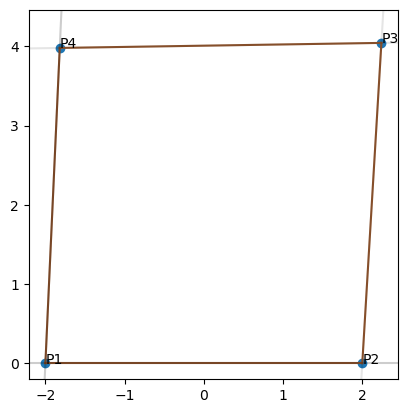

[  3100]   7.319369183162 ||   0.033098
[  3200]   7.319495857122 ||   0.031938
[  3300]   7.319750593658 ||   0.030819
[  3400]   7.319350158359 ||   0.029739
[  3500]   7.319420408440 ||   0.028697
[  3600]   7.319555127638 ||   0.027692
[  3700]   7.319344094036 ||   0.026722
[  3800]   7.319401141352 ||   0.025785
[  3900]   7.319623272845 ||   0.024882
[  4000]   7.319354362829 ||   0.024010
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000001
  polygon-first-eq-last                              0.0000173411
  polygon-first-angle-eq-sampled                     0.0000000001
  para_(connecting P1 P2)_(connecting P3 P4)         0.0647718465
  para_(connecting P1 P4)_(connecting P2 P3)         0.0518674608
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5250415566
  cong_P1_P2_P1_P4                                   0.0155723897
  circumcenter_P2_P4_P1_P3                           6.6620732061
  points                  

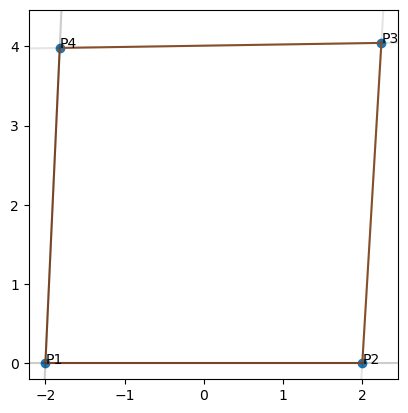

[  4100]   7.319455412387 ||   0.023169
[  4200]   7.319341196283 ||   0.022357
[  4300]   7.319379658061 ||   0.021574
[  4400]   7.319464733706 ||   0.020818
[  4500]   7.319353735588 ||   0.020088
[  4600]   7.319568299806 ||   0.019384
[  4700]   7.319351874565 ||   0.018705
[  4800]   7.319457563925 ||   0.018050
[  4900]   7.319345437291 ||   0.017417
[     0]  40.925015799818 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0009702331
  polygon-first-eq-last                              0.0026234084
  polygon-first-angle-eq-sampled                     0.0145769835
  para_(connecting P1 P2)_(connecting P3 P4)         6.3048568529
  para_(connecting P1 P4)_(connecting P2 P3)         3.0393534260
  perp_(connecting P1 P2)_(connecting P1 P4)         0.8396312637
  cong_P1_P2_P1_P4                                   17.9144034745
  circumcenter_P2_P4_P1_P3                           12.8085893826
  points                

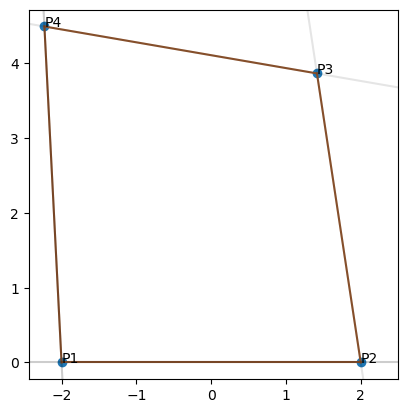

[   100]   7.330248335875 ||   0.096496
[   200]   7.320385050504 ||   0.093115
[   300]   7.319449893819 ||   0.089852
[   400]   7.320235525149 ||   0.086704
[   500]   7.320293245979 ||   0.083666
[   600]   7.319763250847 ||   0.080734
[   700]   7.319471013970 ||   0.077906
[   800]   7.319406125330 ||   0.075176
[   900]   7.319349971062 ||   0.072542
[  1000]   7.319349579439 ||   0.070000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000000
  polygon-first-eq-last                              0.0000124612
  polygon-first-angle-eq-sampled                     0.0000001010
  para_(connecting P1 P2)_(connecting P3 P4)         0.0647905491
  para_(connecting P1 P4)_(connecting P2 P3)         0.0518424186
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5250726094
  cong_P1_P2_P1_P4                                   0.0155613769
  circumcenter_P2_P4_P1_P3                           6.6620595013
  points                  

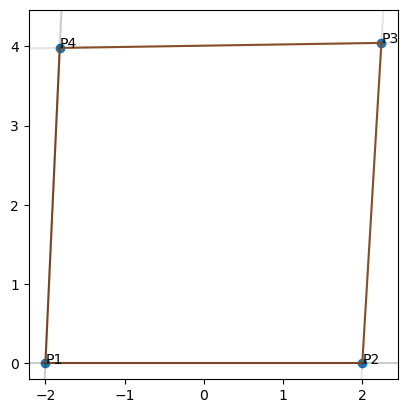

[  1100]   7.319907704127 ||   0.067547
[  1200]   7.319875242500 ||   0.065180
[  1300]   7.319891000290 ||   0.062897
[  1400]   7.319921470850 ||   0.060693
[  1500]   7.319789296397 ||   0.058566
[  1600]   7.319677336644 ||   0.056514
[  1700]   7.319625387524 ||   0.054534
[  1800]   7.319626543442 ||   0.052623
[  1900]   7.319984632548 ||   0.050779
[  2000]   7.319867677994 ||   0.049000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000108100
  polygon-first-eq-last                              0.0004819882
  polygon-first-angle-eq-sampled                     0.0000144264
  para_(connecting P1 P2)_(connecting P3 P4)         0.0657497114
  para_(connecting P1 P4)_(connecting P2 P3)         0.0507850296
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5276140924
  cong_P1_P2_P1_P4                                   0.0163932922
  circumcenter_P2_P4_P1_P3                           6.6588077670
  points                  

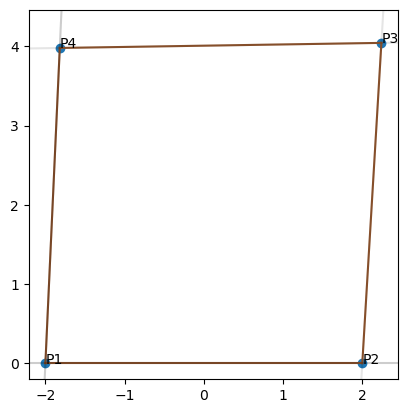

[  2100]   7.319713601966 ||   0.047283
[  2200]   7.319598223375 ||   0.045626
[  2300]   7.319413821518 ||   0.044028
[  2400]   7.319344826009 ||   0.042485
[  2500]   7.319351377725 ||   0.040996
[  2600]   7.319367401657 ||   0.039560
[  2700]   7.319405283168 ||   0.038174
[  2800]   7.319497600875 ||   0.036836
[  2900]   7.319680107680 ||   0.035545
[  3000]   7.320794781711 ||   0.034300
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000001592
  polygon-first-eq-last                              0.0000053863
  polygon-first-angle-eq-sampled                     0.0014251947
  para_(connecting P1 P2)_(connecting P3 P4)         0.0656641142
  para_(connecting P1 P4)_(connecting P2 P3)         0.0506745420
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5282412715
  cong_P1_P2_P1_P4                                   0.0164392426
  circumcenter_P2_P4_P1_P3                           6.6583343105
  points                  

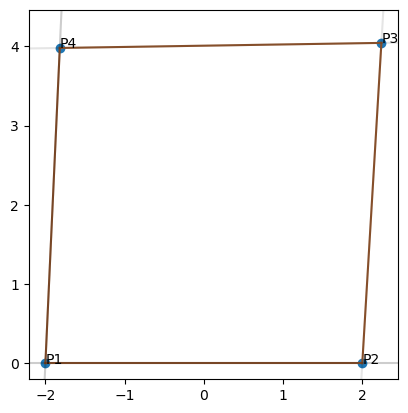

[  3100]   7.319348420952 ||   0.033098
[  3200]   7.319385894646 ||   0.031938
[  3300]   7.319611668889 ||   0.030819
[  3400]   7.319340687414 ||   0.029739
[  3500]   7.319356999755 ||   0.028697
[  3600]   7.319438400761 ||   0.027692
[  3700]   7.319582887345 ||   0.026722
[  3800]   7.319346583740 ||   0.025785
[  3900]   7.319410543490 ||   0.024882
[  4000]   7.319627544811 ||   0.024010
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000017025
  polygon-first-eq-last                              0.0000989260
  polygon-first-angle-eq-sampled                     0.0000048631
  para_(connecting P1 P2)_(connecting P3 P4)         0.0651829028
  para_(connecting P1 P4)_(connecting P2 P3)         0.0559696030
  perp_(connecting P1 P2)_(connecting P1 P4)         0.5111346144
  cong_P1_P2_P1_P4                                   0.0163622195
  circumcenter_P2_P4_P1_P3                           6.6708621508
  points                  

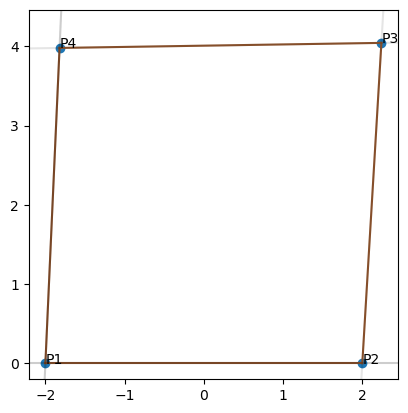

[  4100]   7.319353591920 ||   0.023169
[  4200]   7.319504327492 ||   0.022357
[  4300]   7.319343237230 ||   0.021574
[  4400]   7.319403965497 ||   0.020818
[  4500]   7.319340158858 ||   0.020088
[  4600]   7.319371063892 ||   0.019384
[  4700]   7.319645361453 ||   0.018705
[  4800]   7.319361603755 ||   0.018050
[  4900]   7.319523338841 ||   0.017417


Found 0 models


Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3 P4) polygon ()
assert (para (connecting P1 P2) (connecting P3 P4))
assert (para (connecting P1 P4) (connecting P2 P3))
assert (perp (connecting P1 P2) (connecting P1 P4))
assert (cong P1 P2 P1 P4)
define C1 ((incircle P4 P1 P3))


Sampling initializations...: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


[     0]  19.904318825090 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0097938047
  polygon-first-eq-last                              0.0143343247
  polygon-first-angle-eq-sampled                     0.0241911513
  para_(connecting P1 P2)_(connecting P3 P4)         10.5758572913
  para_(connecting P1 P4)_(connecting P2 P3)         1.1449804023
  perp_(connecting P1 P2)_(connecting P1 P4)         5.0781578833
  cong_P1_P2_P1_P4                                   3.0569938336
  points                                             0.0000101339
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


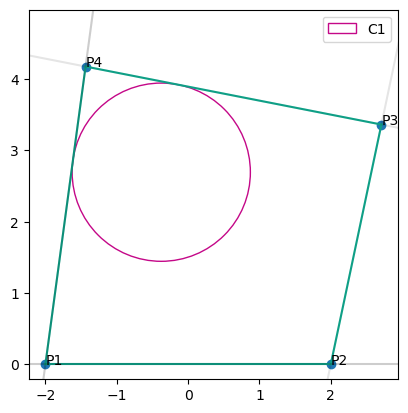

======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000136
  polygon-first-eq-last                              0.0000313294
  polygon-first-angle-eq-sampled                     0.0000322719
  para_(connecting P1 P2)_(connecting P3 P4)         0.0002448207
  para_(connecting P1 P4)_(connecting P2 P3)         0.0000356030
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0000940652
  cong_P1_P2_P1_P4                                   0.0003432190
  points                                             0.0000104856
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


Found 1 models


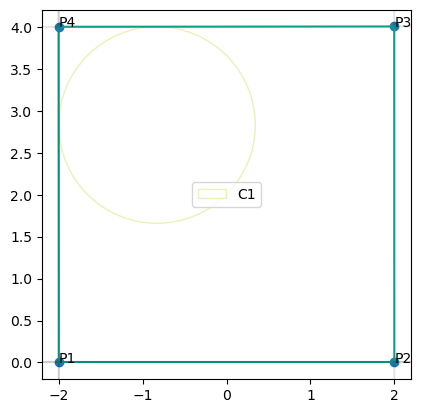

Processing instructions...:   0%|          | 0/7 [00:00<?, ?it/s]

######################## Lines drawn above ########################
['(param (P1 P2 P3 P4) polygon)', '(assert (para (line P1 P2) (line P3 P4)))', '(assert (para (line P1 P4) (line P2 P3)))', '(assert (perp (line P1 P2) (line P1 P4)))', '(assert (cong P1 P2 P1 P4))', '(define C1 circle (incircle P4 P1 P3))']

INPUT INSTRUCTIONS:
sample (P1 P2 P3 P4) polygon ()
assert (para (connecting P1 P2) (connecting P3 P4))
assert (para (connecting P1 P4) (connecting P2 P3))
assert (perp (connecting P1 P2) (connecting P1 P4))
assert (cong P1 P2 P1 P4)
define C1 ((incircle P4 P1 P3))
define C2 ((circumcircle P2 P4 P3))


Sampling initializations...: 100%|██████████| 10/10 [00:25<00:00,  2.52s/it]


[     0]   7.101931243972 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0212226266
  polygon-first-eq-last                              0.0289409097
  polygon-first-angle-eq-sampled                     0.0142041239
  para_(connecting P1 P2)_(connecting P3 P4)         2.7332629049
  para_(connecting P1 P4)_(connecting P2 P3)         2.9255487676
  perp_(connecting P1 P2)_(connecting P1 P4)         0.7853776122
  cong_P1_P2_P1_P4                                   0.5933644066
  points                                             0.0000098925
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


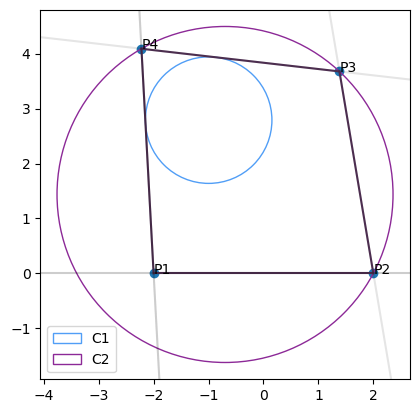

======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000001121
  polygon-first-eq-last                              0.0001834196
  polygon-first-angle-eq-sampled                     0.0000359234
  para_(connecting P1 P2)_(connecting P3 P4)         0.0001253025
  para_(connecting P1 P4)_(connecting P2 P3)         0.0001377848
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0000072236
  cong_P1_P2_P1_P4                                   0.0002517741
  points                                             0.0000104726
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


Found 1 models


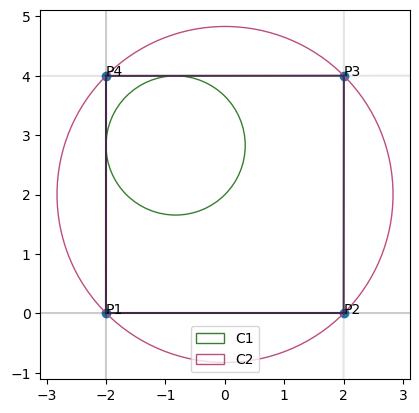

Processing instructions...:   0%|          | 0/8 [00:00<?, ?it/s]

######################## Lines drawn above ########################
['(param (P1 P2 P3 P4) polygon)', '(assert (para (line P1 P2) (line P3 P4)))', '(assert (para (line P1 P4) (line P2 P3)))', '(assert (perp (line P1 P2) (line P1 P4)))', '(assert (cong P1 P2 P1 P4))', '(define C1 circle (incircle P4 P1 P3))', '(define C2 circle (circumcircle P2 P4 P3))']

INPUT INSTRUCTIONS:
sample (P1 P2 P3 P4) polygon ()
assert (para (connecting P1 P2) (connecting P3 P4))
assert (para (connecting P1 P4) (connecting P2 P3))
assert (perp (connecting P1 P2) (connecting P1 P4))
assert (cong P1 P2 P1 P4)
define C1 ((incircle P4 P1 P3))
define C2 ((circumcircle P2 P4 P3))
eval (cycl P3 P4 P1 P2)


Sampling initializations...: 100%|██████████| 10/10 [00:27<00:00,  2.79s/it]


[     0]  25.013329717057 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0565659981
  polygon-first-eq-last                              0.0420725051
  polygon-first-angle-eq-sampled                     0.0146416056
  para_(connecting P1 P2)_(connecting P3 P4)         13.7896611517
  para_(connecting P1 P4)_(connecting P2 P3)         1.9757115464
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0016370409
  cong_P1_P2_P1_P4                                   9.1330294233
  points                                             0.0000104460
  distinct                                           0.0000000000
-- Goals --
  cycl_P3_P4_P1_P2                                   17.3386266607
-- NDGs --


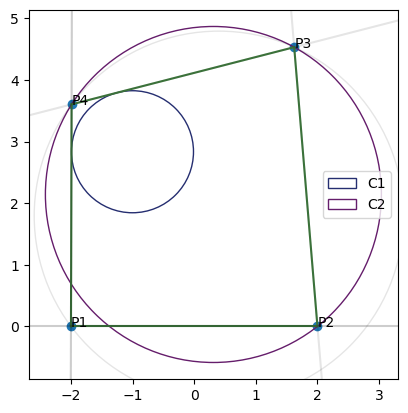

======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000033577
  polygon-first-eq-last                              0.0000420665
  polygon-first-angle-eq-sampled                     0.0000504505
  para_(connecting P1 P2)_(connecting P3 P4)         0.0000551190
  para_(connecting P1 P4)_(connecting P2 P3)         0.0004487193
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0000370727
  cong_P1_P2_P1_P4                                   0.0000181556
  points                                             0.0000104771
  distinct                                           0.0000000000
-- Goals --
  cycl_P3_P4_P1_P2                                   0.0042686638
-- NDGs --


Found 1 models


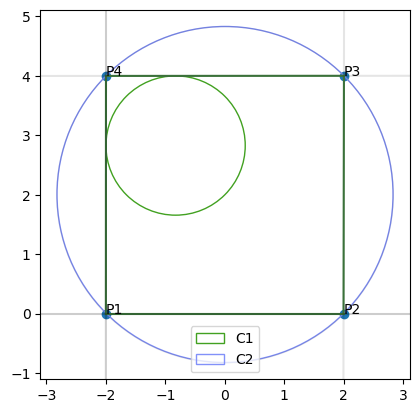

######################## Lines drawn above ########################
['(param (P1 P2 P3 P4) polygon)', '(assert (para (line P1 P2) (line P3 P4)))', '(assert (para (line P1 P4) (line P2 P3)))', '(assert (perp (line P1 P2) (line P1 P4)))', '(assert (cong P1 P2 P1 P4))', '(define C1 circle (incircle P4 P1 P3))', '(define C2 circle (circumcircle P2 P4 P3))', '(eval (cycl P3 P4 P1 P2))']



In [5]:
num_steps = 3
num_eval = 1
max_eval_attempt = round(math.sqrt(100))
readers, figs = generate_graph(args, num_steps, num_eval, max_eval_attempt=max_eval_attempt)

In [7]:
figs

[[Diagram(named_points={<primitives.Point object at 0x00000235042D1A60>: TfPoint(x=-2.0, y=0.0), <primitives.Point object at 0x00000235042D14C0>: TfPoint(x=2.0, y=0.0), <primitives.Point object at 0x00000235042D1F40>: TfPoint(x=2.0039821062979475, y=4.001913891903952), <primitives.Point object at 0x00000235042D17F0>: TfPoint(x=-1.999407659859735, y=3.9997431566413804)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=-2.0, y=0.0), TfPoint(x=2.0, y=0.0)), (TfPoint(x=2.0, y=0.0), TfPoint(x=2.0039821062979475, y=4.001913891903952)), (TfPoint(x=2.0039821062979475, y=4.001913891903952), TfPoint(x=-1.999407659859735, y=3.9997431566413804)), (TfPoint(x=-1.999407659859735, y=3.9997431566413804), TfPoint(x=-2.0, y=0.0))], seg_colors=[array([0.97654874, 0.67950787, 0.19657116]), array([0.97654874, 0.67950787, 0.19657116]), array([0.97654874, 0.67950787, 0.19657116]), array([0.97654874, 0.67950787, 0.19657116])], unnamed_points=[], unnamed_lines=[LineNF(n=TfPoint(x=0.0, y=1.0), r=0.0), Lin

In [9]:
for item in readers:
    print(item)

    for pr_item in item.problem_lines:
        print(pr_item)
    print('')

(param (P1 P2 P3 P4) polygon)
(assert (para (line P1 P2) (line P3 P4)))
(assert (para (line P1 P4) (line P2 P3)))
(assert (perp (line P1 P2) (line P1 P4)))
(assert (cong P1 P2 P1 P4))

(param (P1 P2 P3 P4) polygon)
(assert (para (line P1 P2) (line P3 P4)))
(assert (para (line P1 P4) (line P2 P3)))
(assert (perp (line P1 P2) (line P1 P4)))
(assert (cong P1 P2 P1 P4))
(define C1 circle (incircle P4 P1 P3))

(param (P1 P2 P3 P4) polygon)
(assert (para (line P1 P2) (line P3 P4)))
(assert (para (line P1 P4) (line P2 P3)))
(assert (perp (line P1 P2) (line P1 P4)))
(assert (cong P1 P2 P1 P4))
(define C1 circle (incircle P4 P1 P3))
(define C2 circle (circumcircle P2 P4 P3))
(eval (cycl P3 P4 P1 P2))

(param (P1 P2 P3 P4) polygon)
(assert (para (line P1 P2) (line P3 P4)))
(assert (para (line P1 P4) (line P2 P3)))
(assert (perp (line P1 P2) (line P1 P4)))
(assert (cong P1 P2 P1 P4))
(define C1 circle (incircle P4 P1 P3))
(define C2 circle (circumcircle P2 P4 P3))
(eval (cycl P3 P4 P1 P2))



Processing instructions...:   0%|          | 0/8 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3 P4) polygon ()
assert (para (connecting P1 P2) (connecting P3 P4))
assert (para (connecting P1 P4) (connecting P2 P3))
assert (perp (connecting P1 P2) (connecting P1 P4))
assert (cong P1 P2 P1 P4)
define C1 ((incircle P4 P1 P3))
define C2 ((circumcircle P2 P4 P3))
eval (cycl P3 P4 P1 P2)


Sampling initializations...: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


[     0]  22.014526946296 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0498321664
  polygon-first-eq-last                              0.0247477107
  polygon-first-angle-eq-sampled                     0.0074474072
  para_(connecting P1 P2)_(connecting P3 P4)         6.2641604928
  para_(connecting P1 P4)_(connecting P2 P3)         4.4479568547
  perp_(connecting P1 P2)_(connecting P1 P4)         0.2422784772
  cong_P1_P2_P1_P4                                   10.9780927279
  points                                             0.0000111093
  distinct                                           0.0000000000
-- Goals --
  cycl_P3_P4_P1_P2                                   4.1102022005
-- NDGs --


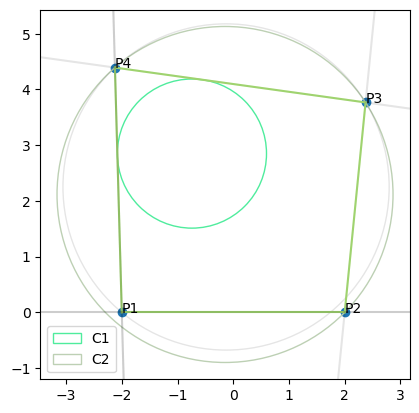

======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000003214
  polygon-first-eq-last                              0.0006061812
  polygon-first-angle-eq-sampled                     0.0000238841
  para_(connecting P1 P2)_(connecting P3 P4)         0.0000001441
  para_(connecting P1 P4)_(connecting P2 P3)         0.0000751410
  perp_(connecting P1 P2)_(connecting P1 P4)         0.0000007729
  cong_P1_P2_P1_P4                                   0.0001039289
  points                                             0.0000104702
  distinct                                           0.0000000000
-- Goals --
  cycl_P3_P4_P1_P2                                   0.0002992002
-- NDGs --


Found 1 models


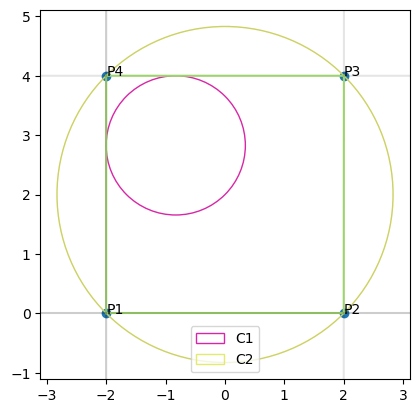

In [10]:
#lines = ['(param (P1 P2 P3) equi-tri )', '(param (P5 P6 P7 P8) polygon)']

lines = readers[-1].problem_lines
reader = InstructionReader(lines)
fig = solve_draw(args, reader)

In [11]:
print(reader.problem_lines)

['(param (P1 P2 P3 P4) polygon)', '(assert (para (line P1 P2) (line P3 P4)))', '(assert (para (line P1 P4) (line P2 P3)))', '(assert (perp (line P1 P2) (line P1 P4)))', '(assert (cong P1 P2 P1 P4))', '(define C1 circle (incircle P4 P1 P3))', '(define C2 circle (circumcircle P2 P4 P3))', '(eval (cycl P3 P4 P1 P2))']
